In [47]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

import warnings
warnings.filterwarnings('ignore')

In [48]:
data = load_iris(as_frame=True)
df = data.frame


In [49]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [51]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


## EDA

Text(0, 0.5, 'Frequency')

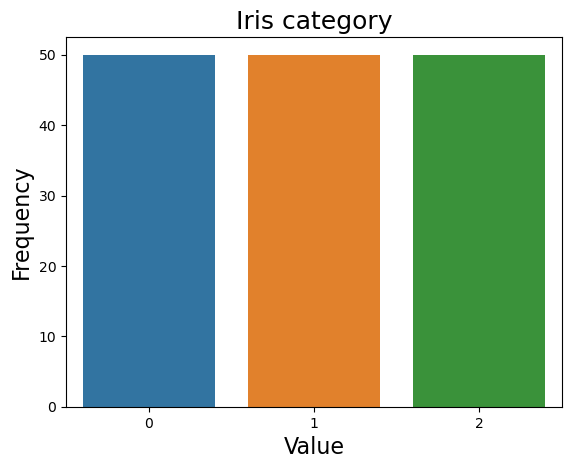

In [52]:
sns.countplot(df['target'])
plt.title('Iris category', fontsize=18)
plt.xlabel('Value', fontsize=16)
plt.ylabel('Frequency', fontsize=16)

In [53]:
X = df.drop('target', axis=1)
y = df['target']

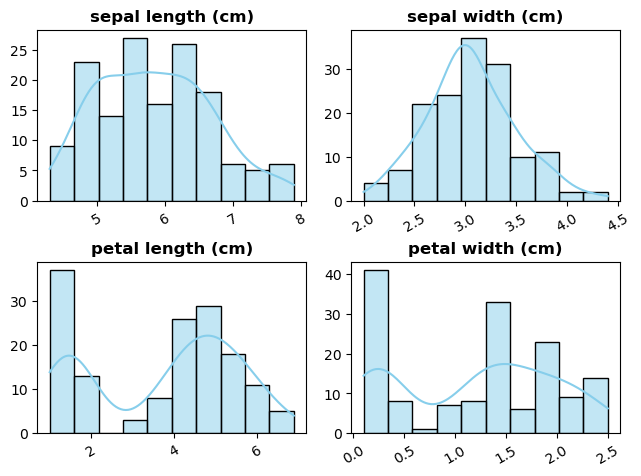

In [54]:
# Iterate over columns and plot
for i, col in enumerate(X.columns, 1):
    plt.subplot(2, 2, i)  # Create subplots dynamically
    sns.histplot(data=df, x=col, kde=True, bins=10, color='skyblue')  # Add histograms
    plt.title(col, weight='bold', fontsize=12)  # Adjust font size for better readability
    plt.ylabel("")  # Remove redundant y-axis label
    plt.xlabel("")  # Remove redundant x-axis label
    plt.xticks(rotation=30, fontsize=10)  # Rotate x-axis labels for better visibility
    plt.yticks(fontsize=10)  # Adjust y-axis ticks size

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

In [55]:
df.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'target'],
      dtype='object')

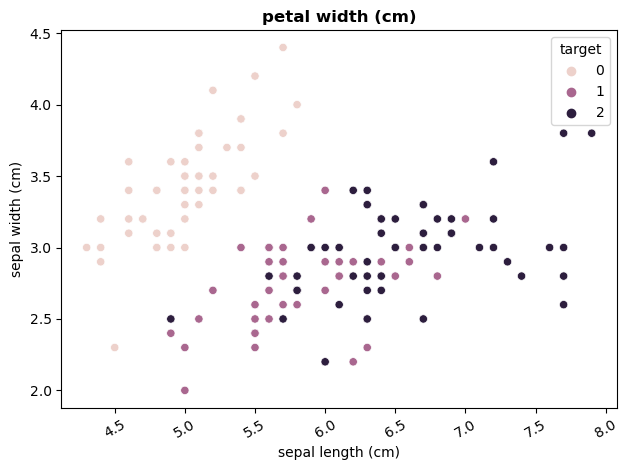

In [56]:
sns.scatterplot(data=df, x="sepal length (cm)", y="sepal width (cm)", hue="target")# Add histograms
plt.title(col, weight='bold', fontsize=12)  # Adjust font size for better readability
plt.xticks(rotation=30, fontsize=10)  # Rotate x-axis labels for better visibility
plt.yticks(fontsize=10)  # Adjust y-axis ticks size

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

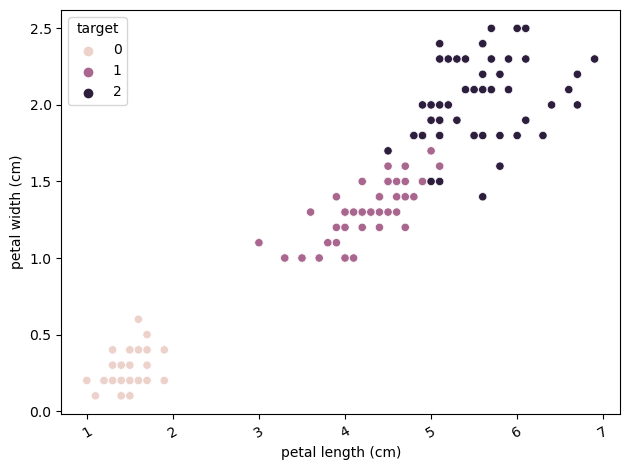

In [57]:
sns.scatterplot(data=df, x="petal length (cm)", y="petal width (cm)", hue="target")# Add histograms
plt.xticks(rotation=30, fontsize=10)  # Rotate x-axis labels for better visibility
plt.yticks(fontsize=10)  # Adjust y-axis ticks size

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

## Model

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [66]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [67]:
y_pred = knn.predict(X_test)
y_pred_train = knn.predict(X_train)

In [68]:
print("Test KNN classifier accuracy: ", accuracy_score(y_test, y_pred))
print("Train KNN classifier accuracy: ", accuracy_score(y_train, y_pred_train))

Test KNN classifier accuracy:  1.0
Train KNN classifier accuracy:  0.9523809523809523


## Hyperparameter tunning

In [69]:
train_score = {}
test_score = {}
n_neighbors = np.arange(2, 30, 1)

for neighbor in n_neighbors:
    knn = KNeighborsClassifier(n_neighbors=neighbor)
    knn.fit(X_train, y_train)
    train_score[neighbor]=knn.score(X_train, y_train)
    test_score[neighbor]=knn.score(X_test, y_test)


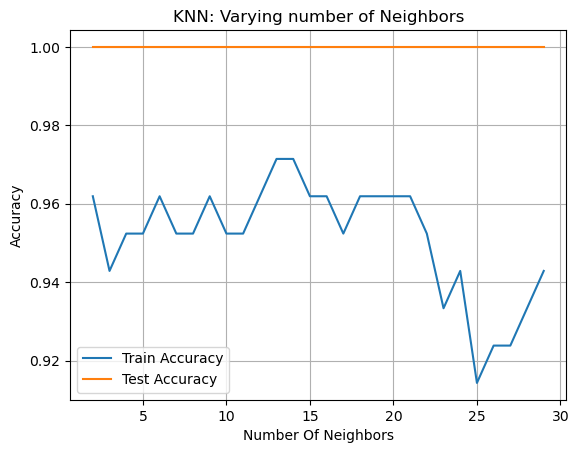

In [70]:
plt.plot(n_neighbors, train_score.values(), label="Train Accuracy")
plt.plot(n_neighbors, test_score.values(), label="Test Accuracy")
plt.xlabel("Number Of Neighbors")
plt.ylabel("Accuracy")
plt.title("KNN: Varying number of Neighbors")
plt.legend()
#plt.xlim(0, 33)
#plt.ylim(0.60, 0.90)
plt.grid()
plt.show()